In [32]:
%pylab inline
import os, sys
import scipy
import random
from glob import glob
from scipy.io import loadmat
from scipy.sparse.linalg import eigsh
from mpl_toolkits import mplot3d
from scipy.stats import skewnorm 
from scipy.stats import skew, kurtosis
import matplotlib.gridspec as Gridspec

plt.rcParams['figure.figsize'] = (20, 10) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
def abib_metric(X):
    n = X.shape[0]
    X2 = X**2
    EX2 = mean(sum(X2, axis=0))
    r = EX2/n
    return r 

In [9]:
abib_metric(randn(100, 10000))

1.0016983121262668

In [4]:
data_root = "/Users/duuta/ppp/data/stringer/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]
data = loadmat(os.path.join(data_root, data_files[1]), simplify_cells = True) 
spont = data['stim']['spont']
resp = data['stim']['resp']

In [27]:
# spont resp for subG and subE using random subsets of 
# REAL data

n_dims =[1, 10, 50, 100, 150, 200, 300, 500, 700, 1000, 2000]

spont_results =[]
means_spont = []
std_spont = []
resResults = []
means_res = []
std_res = []


for _n in n_dims:
    spont_results_per_dim =[]
    resResults_per_dim =[]
    for _ in range(10):
        dx, dr = random.sample(list(spont), k=_n), random.sample(list(resp), k=_n)
        dx, dr = array(dx), array(dr)
        assert dx.shape == (_n, spont.shape[1]), "dx has wrong shape" 
        assert dr.shape == (_n, resp.shape[1]), "dr has wrong shape" 
        rx, rr = abib_metric(dx/std(dx)), abib_metric(dr/std(dr))
        spont_results_per_dim.append(rx)
        resResults_per_dim.append(rr)    
    spont_results.append(spont_results_per_dim)
    resResults.append(spont_results_per_dim)
    means_spont.append(mean(spont_results_per_dim))
    std_spont.append(std(spont_results_per_dim))
    means_res.append(mean(resResults_per_dim))
    std_res.append(std(resResults_per_dim))

In [28]:
spont_errorbars = asarray(spont_results) - asarray(std_spont).reshape(11, 1)
res_errorbars = asarray(resResults) - asarray(std_res).reshape(11, 1)

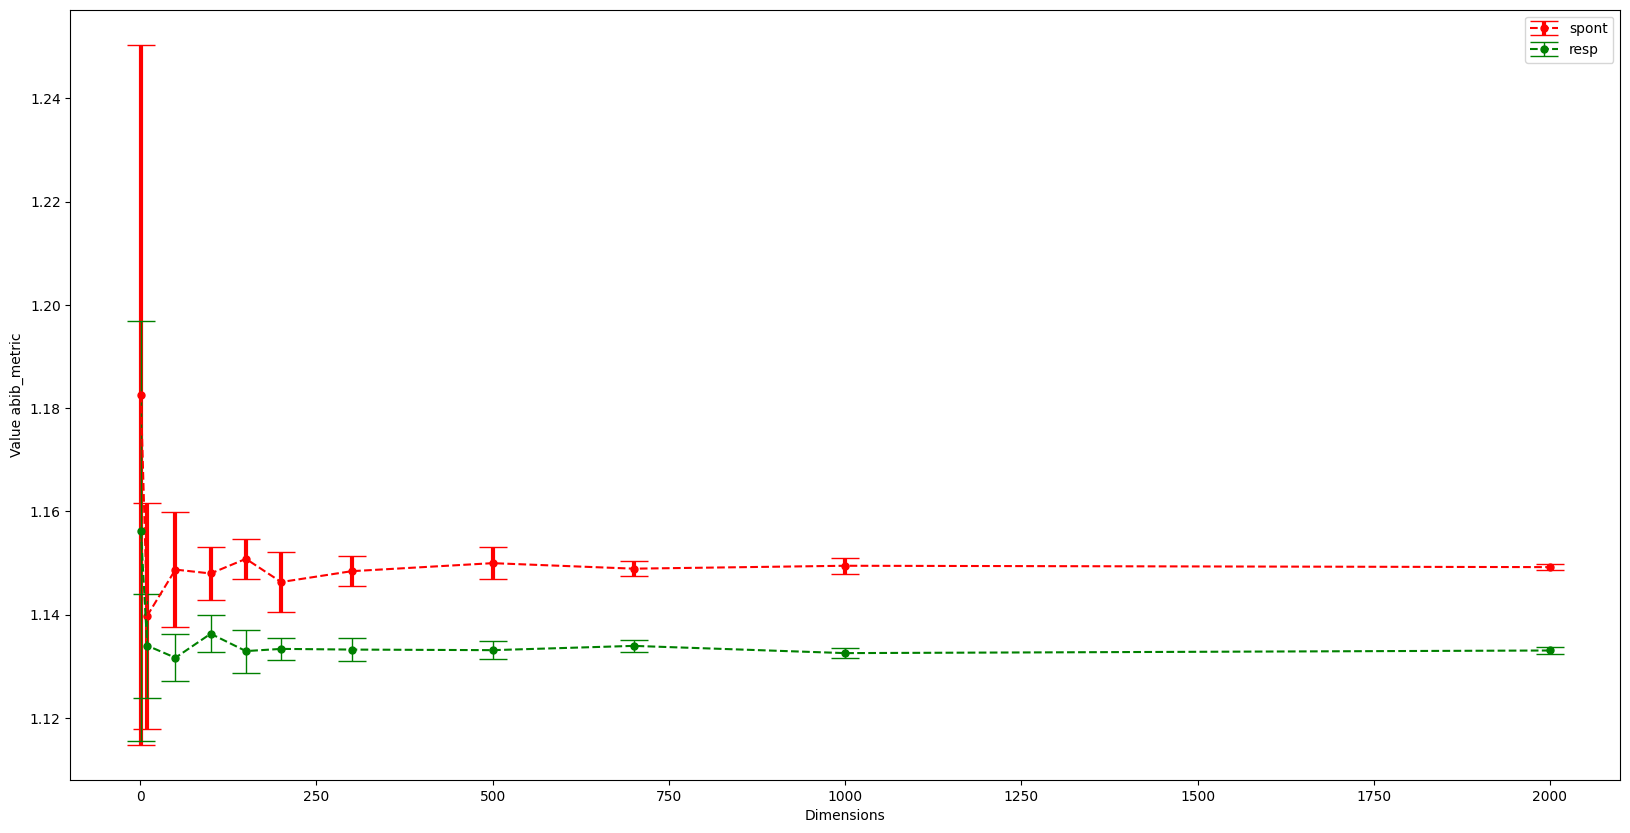

In [33]:
plt.errorbar(n_dims, means_spont, label='spont',  yerr=std_spont, fmt = '--ro', ms=5, elinewidth = 3, capsize = 10, capthick = 1)
plt.errorbar(n_dims, means_res, label='resp', yerr=std_res, fmt = '--go', ms=5, elinewidth = 1, capsize = 10, capthick = 1)
xlabel('Dimensions')
ylabel('Value abib_metric')
legend();

